# --------------------------> Heart Attack Analysis <-------------------------------

# Libraries and Data Information

In [505]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve

from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

### Introduction
A heart attack, also known as a myocardial infarction, occurs when a part of the heart muscle doesn't receive enough blood. Without treatment to restore blood flow, the longer the time passes, the more damage is done to the heart muscle. Coronary artery disease (CAD) is the primary cause of a heart attack.

In addition to coronary artery disease, other factors such as high blood pressure, high cholesterol, smoking, obesity, physical inactivity, diabetes, and a family history of heart disease can increase the risk of a heart attack. Recognizing the signs and symptoms of a heart attack, such as chest pain, shortness of breath, nausea, and lightheadedness, is critical for prompt medical attention. Treatment options for a heart attack may include medication, surgery, lifestyle changes, or a combination of these approaches.

### Data Content
**age** - age in years

**sex** - sex (1 = male; 0 = female)

**cp** - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

**trestbps** - resting blood pressure (in mm Hg on admission to the hospital)

**chol** - serum cholestoral in mg/dl

**fbs** - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

**restecg** - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

**thalach** - maximum heart rate achieved

**exang** - exercise induced angina (1 = yes; 0 = no)

**oldpeak** - ST depression induced by exercise relative to rest

**slope** - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

**ca** - number of major vessels (0-3) colored by flourosopy

**thal** - 2 = normal; 1 = fixed defect; 3 = reversable defect

**output** - output : 0= less chance of heart attack 1= more chance of heart attack

In [506]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [507]:
# information about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [508]:
# describe basic statistics of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [509]:
df.output.value_counts(normalize = True)

1    0.544554
0    0.455446
Name: output, dtype: float64

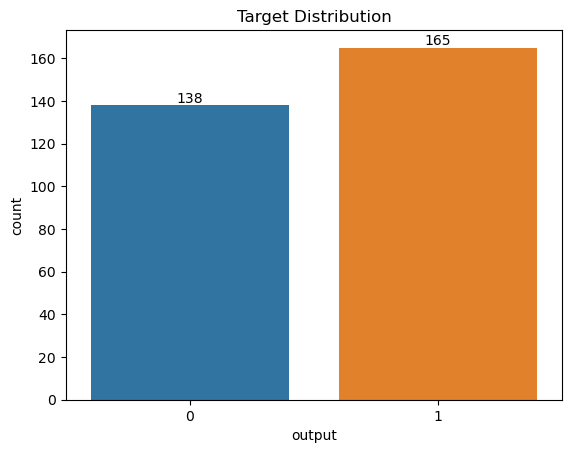

In [510]:
# target variable distribution

ax = sns.countplot(x = df.output)
ax.bar_label(ax.containers[0])
plt.title("Target Distribution")
plt.show()

In [511]:
# checking for null values

df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [512]:
# Let's create a more detailed table for our features

# Create an empty list to store the output data
output_data = []

for col in df.columns:
    
    # If the number of unique values in the column is less than or equal to 5
    if df.loc[:, col].nunique() <= 5:
        # Get the unique values in the column
        unique_values = df.loc[:, col].unique()
        # Append the column name, number of unique values, unique values, and data type to the output data
        output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
    else:
        # Otherwise, append only the column name, number of unique values, and data type to the output data
        output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

output_df

,Column Name,Number of Unique Values,Unique Values,Data Type
0,age,41,-,int64
1,sex,2,"[1, 0]",int64
2,cp,4,"[3, 2, 1, 0]",int64
3,trtbps,49,-,int64
4,chol,152,-,int64
5,fbs,2,"[1, 0]",int64
6,restecg,3,"[0, 1, 2]",int64
7,thalachh,91,-,int64
8,exng,2,"[0, 1]",int64
9,oldpeak,40,-,float64


In [513]:
def grab_col_names(dataframe, cat_th=10):

    # cat_cols
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]    
    cat_cols = cat_cols + num_but_cat
    

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Features: {dataframe.shape[1]}")
    print(f'Number of Categorical Features: {len(cat_cols)}')
    print(f'Number of Numeric Features: {len(num_cols)}')
    
    
    return cat_cols, num_cols

In [514]:
cat_cols, num_cols = grab_col_names(df)

Features: 14
Number of Categorical Features: 9
Number of Numeric Features: 5


In [515]:
print(cat_cols)
print(num_cols)

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']


## Categorical Feature Analysis

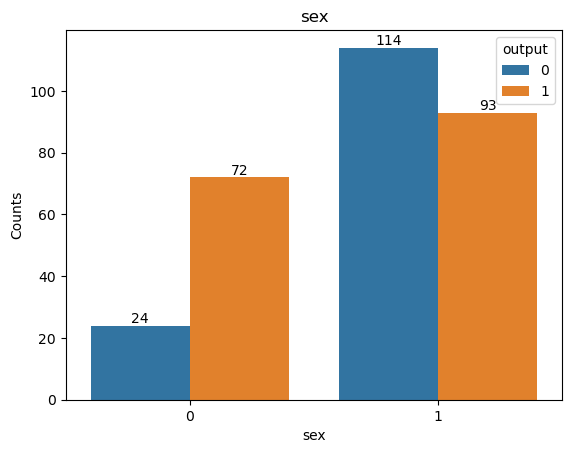

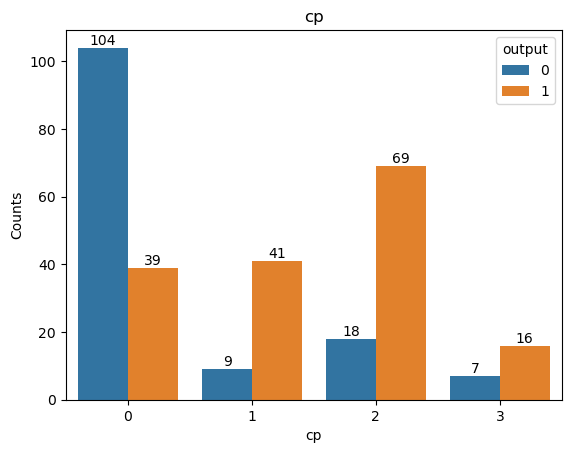

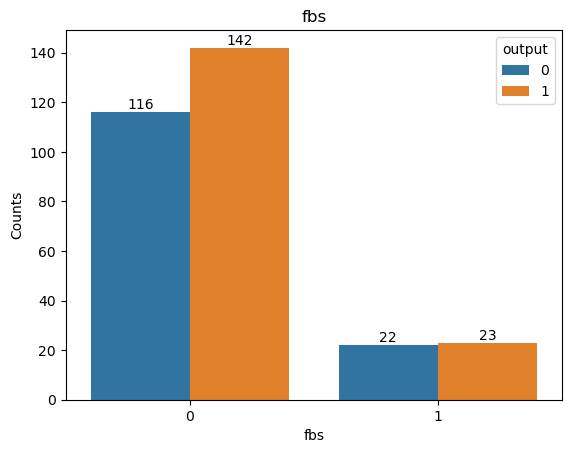

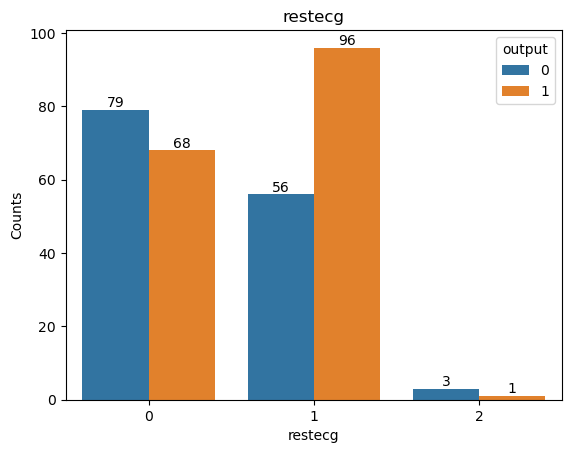

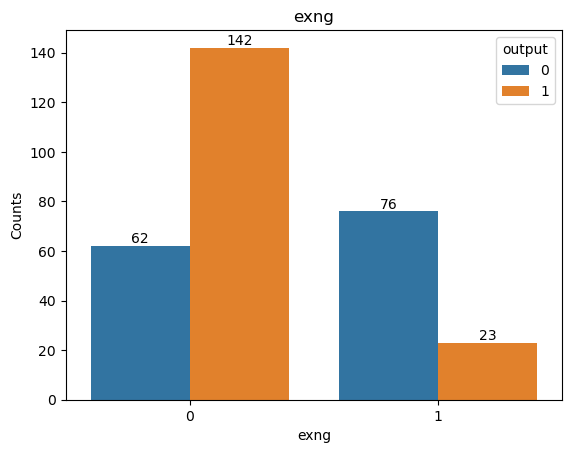

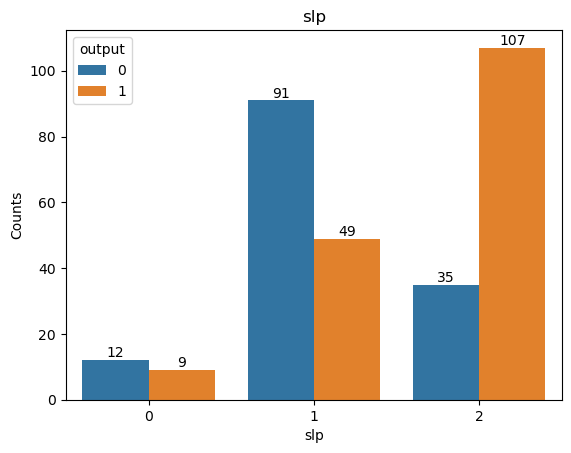

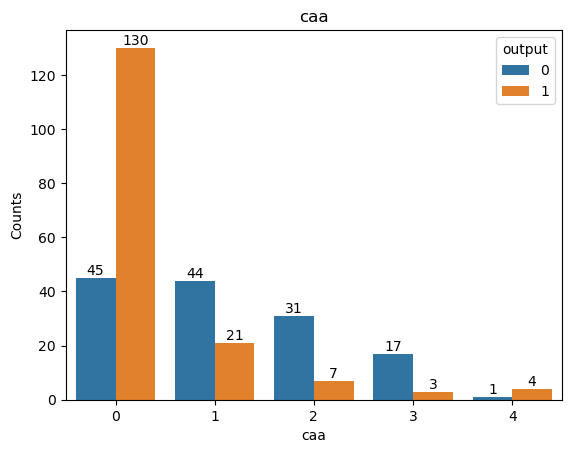

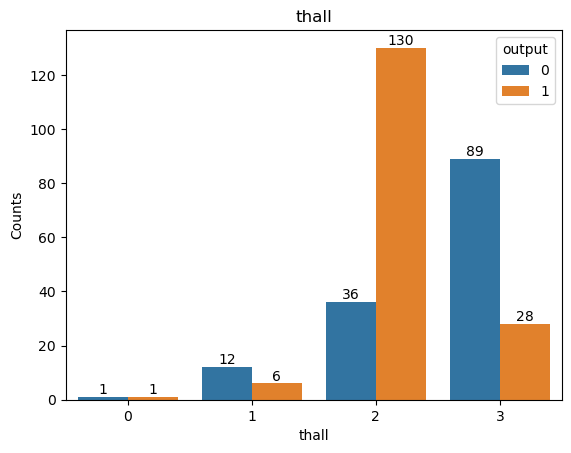

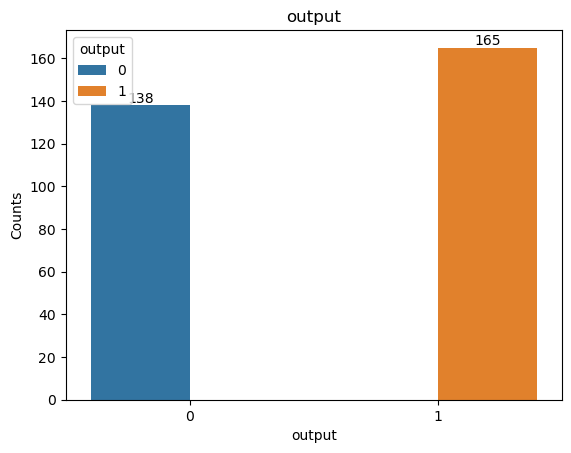

In [516]:
for i in cat_cols:
    fig, ax = plt.subplots()
    sns.countplot(ax = ax, data = df, x = df[i], hue = "output")
    ax.set(ylabel='Counts', title=i)
    
    for j in [0,1]:
        ax.bar_label(ax.containers[j])


## Numeric Feature Analysis

In [517]:
# add the target variable to the numeric column list
num_cols.append("output")   
num_cols

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']

In [518]:
def histPlot(num):
    sns.histplot(data = df, x = num, bins = 50, kde = True)
    print("{} distribution with hist:".format(num))
    plt.show()

age distribution with hist:


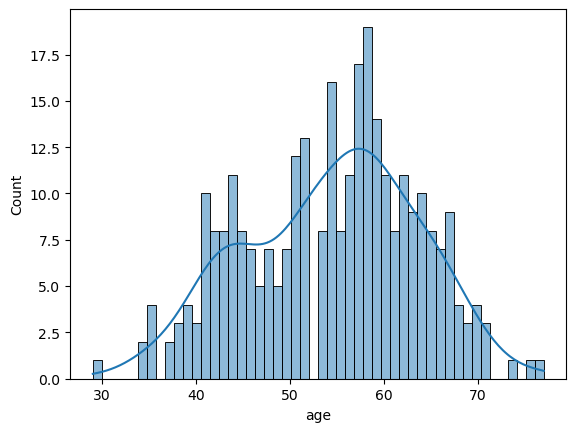

trtbps distribution with hist:


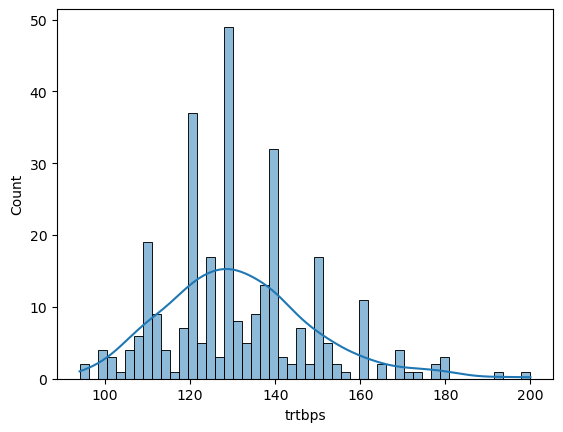

chol distribution with hist:


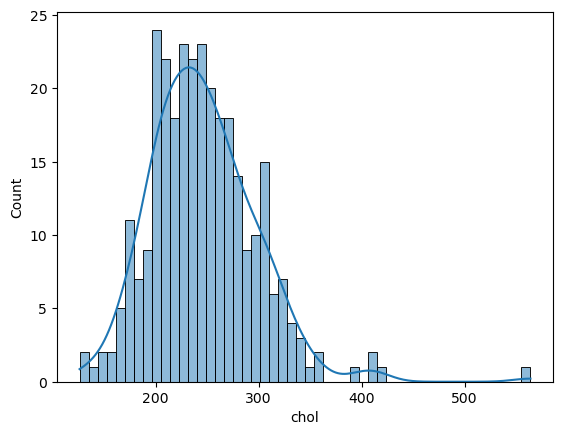

thalachh distribution with hist:


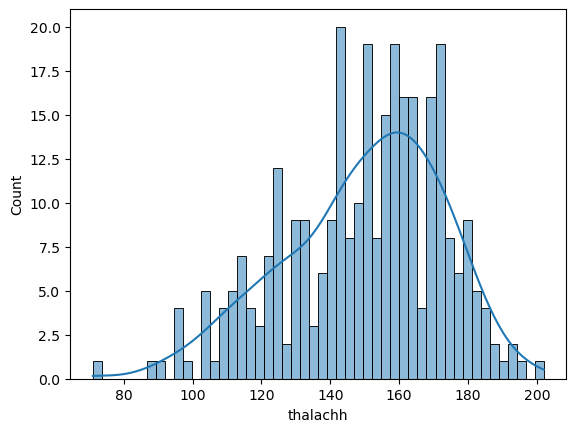

oldpeak distribution with hist:


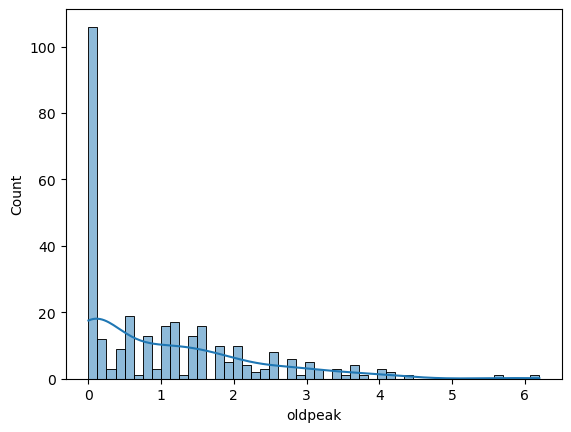

output distribution with hist:


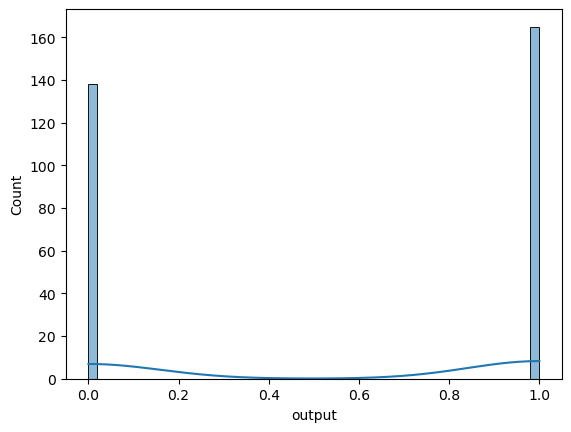

In [519]:
for i in num_cols:
    histPlot(i)

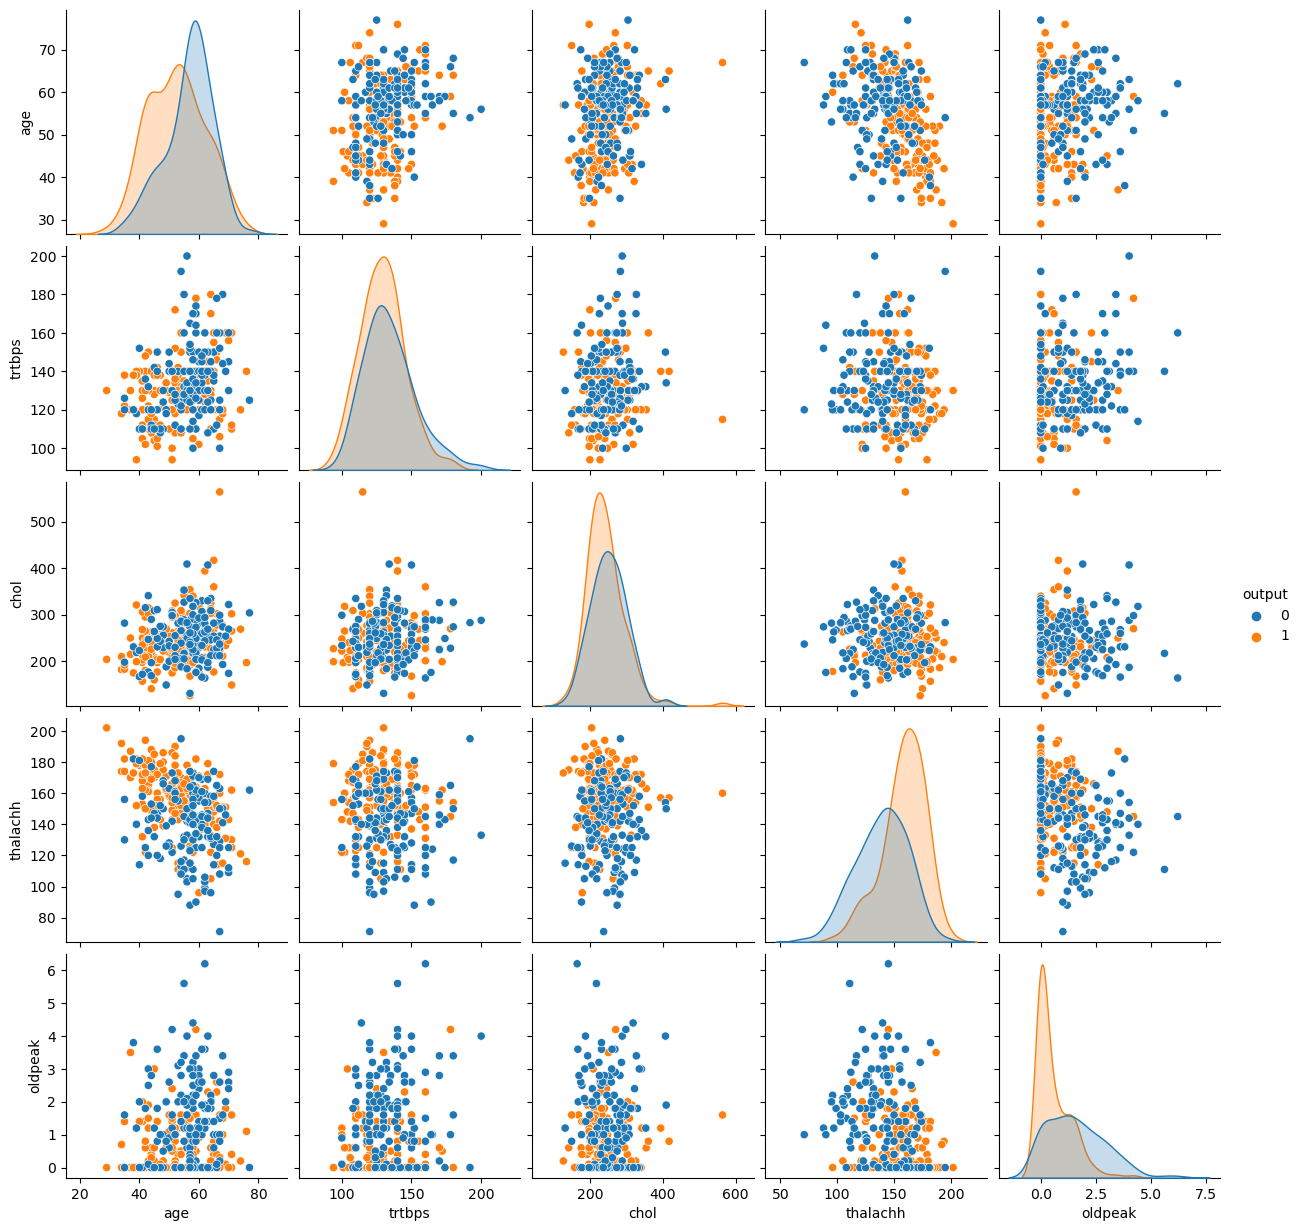

In [520]:
df_numeric = df.loc[:, num_cols]
sns.pairplot(df_numeric, hue = "output", diag_kind = "kde")
plt.show()

## Outlier

In [521]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df[num_cols[:-1]])

# let's collect standardized numeric columns in dataframe
df_dummy = pd.DataFrame(scaled_array, columns = num_cols[:-1])


# let's add the target variable
df_dummy = pd.concat([df_dummy, df.loc[:, "output"]], axis = 1)
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1


* The **pd.melt()** function is used to transform a wide-format data frame into a long-format data frame. The function changes the columns in the data frame so that the values of the examples are consolidated into a single column. This operation is useful for many different data processing scenarios, especially for data visualization tasks.

In [522]:
# data_melted = pd.melt(df[num_cols], id_vars = "output", var_name = "features", value_name = "value")
# data_melted

data_melted = pd.melt(df_dummy, id_vars = "output", var_name = "features", value_name = "value")
data_melted

,output,features,value
0,1,age,0.952197
1,1,age,-1.915313
2,1,age,-1.474158
3,1,age,0.180175
4,1,age,0.290464
...,...,...,...
1510,0,oldpeak,-0.724323
1511,0,oldpeak,0.138373
1512,0,oldpeak,2.036303
1513,0,oldpeak,0.138373


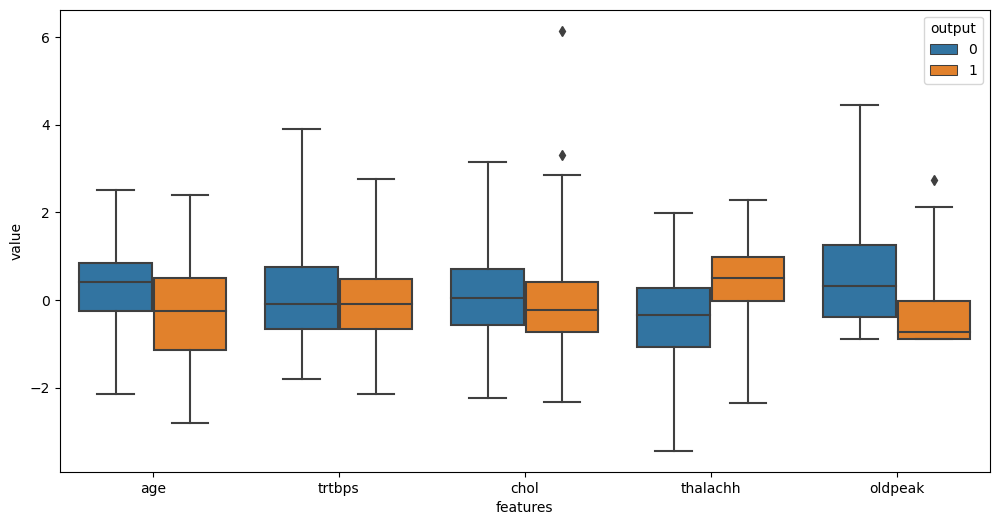

In [523]:
# box plot
plt.figure(figsize = (12,6))
sns.boxplot(x = "features", y = "value", hue = "output", data= data_melted, whis=2.5)
plt.show()

#### Scaler işlemi yapılmadan önce
<img src = "Normal1.png">

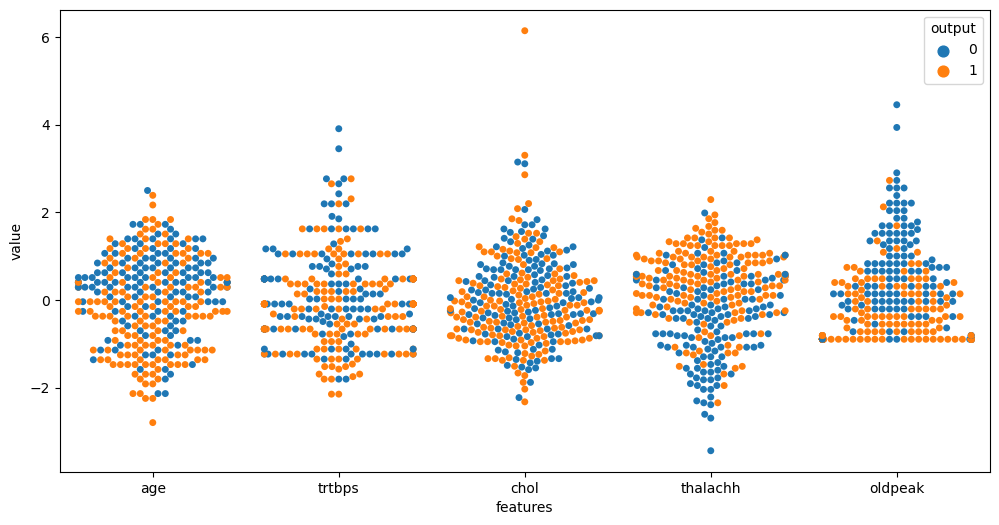

In [524]:
# swarm plot
plt.figure(figsize = (12,6))
sns.swarmplot(x = "features", y = "value", hue = "output", data= data_melted)
plt.show()

#### Scaler işlemi yapılmadan önce
<img src = "Normal2.png">

* Yukarıdaki swarmplot grafiği ile ayrışmaları gözlemleyebiliriz

In [525]:
num_cols

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']

In [526]:
numeric_list = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [527]:
outlier_indices = []  # Tüm outlier indexlerini toplamak için boş bir liste oluşturuyoruz

for i in numeric_list:
    # IQR
    Q1 = np.percentile(df.loc[:, i], 25)
    Q3 = np.percentile(df.loc[:, i], 75)
    IQR = Q3 - Q1
    
    # Upper bound ve lower bound hesaplanıyor
    upper_bound = Q3 + 2.5 * IQR
    lower_bound = Q1 - 2.5 * IQR
    
    # Outlier olan satırların indexleri tespit ediliyor
    upper_outliers = df.index[df.loc[:, i] > upper_bound].tolist()
    lower_outliers = df.index[df.loc[:, i] < lower_bound].tolist()
    
    # Toplanan indexleri outlier_indices listesine ekliyoruz
    outlier_indices.extend(upper_outliers)
    outlier_indices.extend(lower_outliers)
    
# outlier_indices listesindeki indexleri tekrarlamadan alıyoruz (unique yapmak için)
outlier_indices = list(set(outlier_indices))

print("Outlier olan satırların indexleri: ", outlier_indices)

Outlier olan satırların indexleri:  [248, 204, 85, 223]


In [528]:
# df.drop(outlier_indices, inplace=True)

In [529]:
df.shape

(303, 14)

## Correlation Analysis

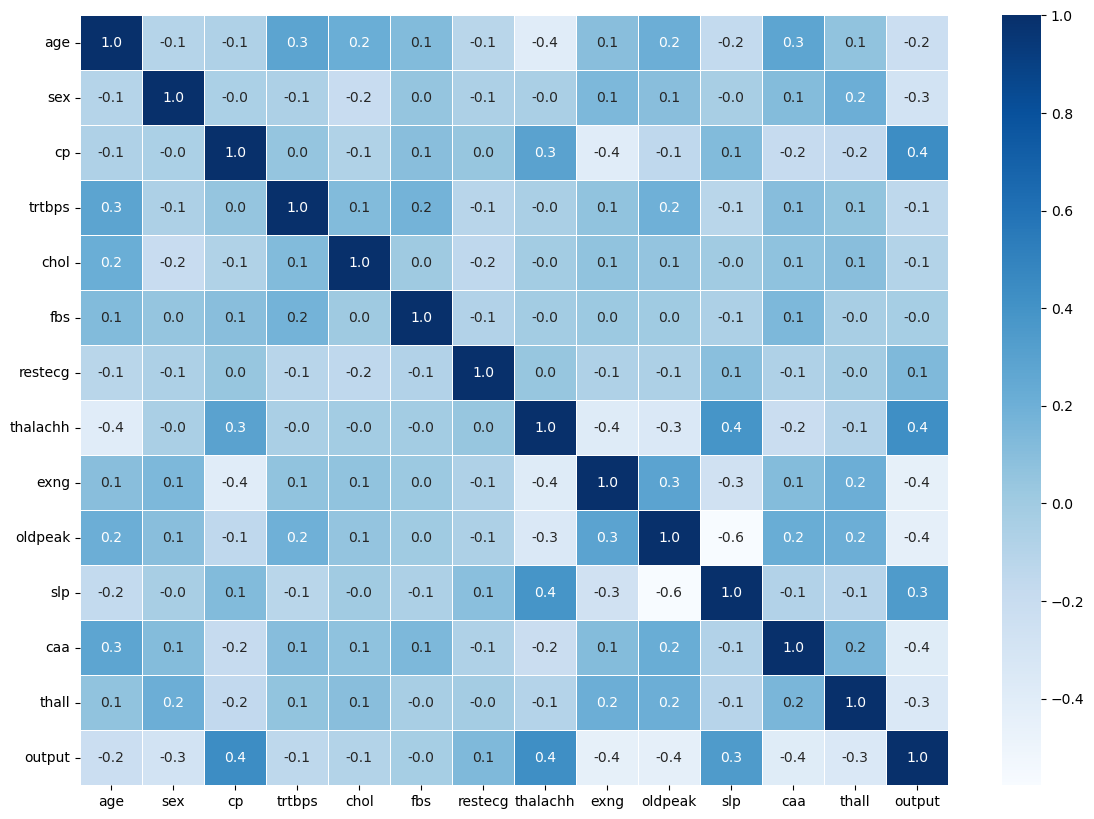

In [530]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7, cmap="Blues")
plt.show()

In [531]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

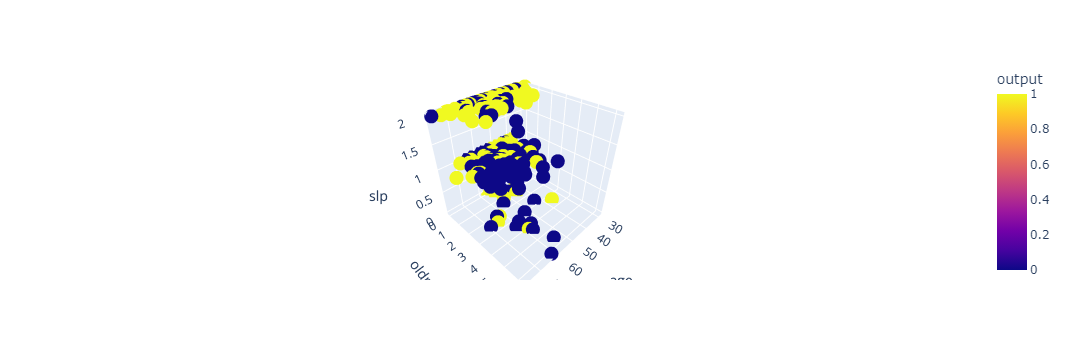

In [532]:
fig = px.scatter_3d(df, x = 'age', y = 'oldpeak', z = 'slp', color = 'output')
fig.show()

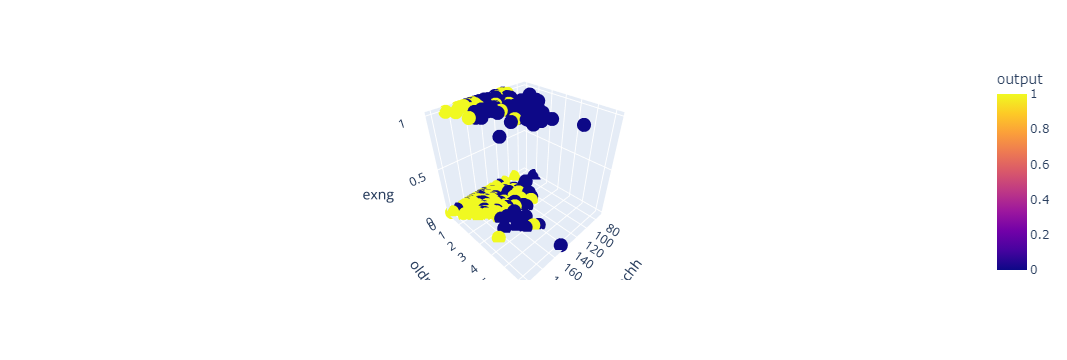

In [533]:
fig = px.scatter_3d(df, x = 'thalachh', y = 'oldpeak', z = 'exng', color = 'output')
fig.show()

## Get dummies

In [534]:
num_cols

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']

In [535]:
cat_cols

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [536]:
for col in df[cat_cols]:
    print(f"{col:<20}:", df[col].nunique())

sex                 : 2
cp                  : 4
fbs                 : 2
restecg             : 3
exng                : 2
slp                 : 3
caa                 : 5
thall               : 4
output              : 2


In [537]:
df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'], drop_first = True)
df.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [538]:
corr_output = df.corr()["output"].sort_values()[:-1]
corr_output

thall_3     -0.486112
exng_1      -0.436757
oldpeak     -0.430696
slp_1       -0.362053
sex_1       -0.280937
caa_2       -0.273998
caa_1       -0.232412
age         -0.225439
caa_3       -0.210615
trtbps      -0.144931
thall_1     -0.106589
chol        -0.085239
restecg_2   -0.068410
fbs_1       -0.028046
caa_4        0.066441
cp_3         0.086957
restecg_1    0.175322
cp_1         0.245879
cp_2         0.316742
slp_2        0.394066
thalachh     0.421741
thall_2      0.527334
Name: output, dtype: float64

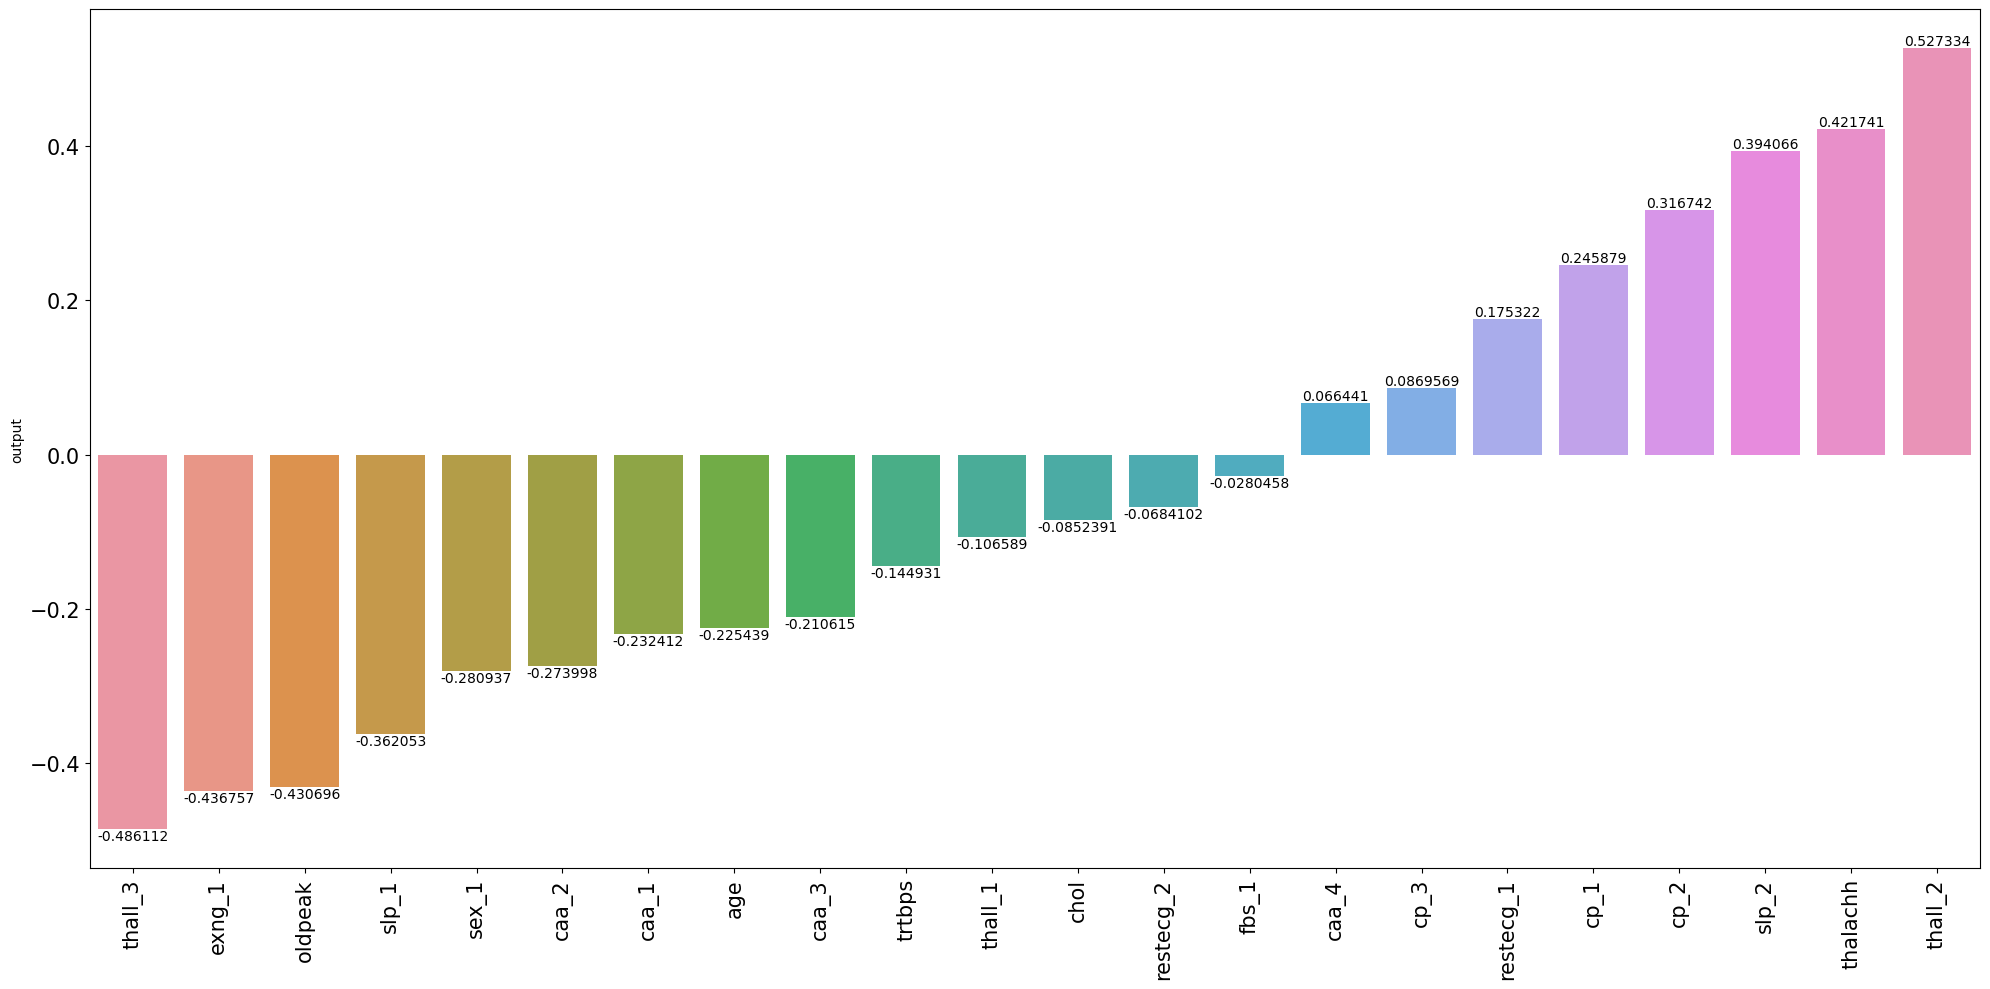

In [539]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = corr_output.index, y = corr_output)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90, fontsize=15)  
plt.yticks(fontsize=15) 
plt.tight_layout()
plt.show()

# Modelling

## Train & Test Split and Scaling

In [540]:
X = df.drop(["output"], axis = 1)
y = df["output"]

In [541]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [542]:
scaler = StandardScaler()

In [543]:
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

## Logistic Regression (Base Model)

In [544]:
log_model = LogisticRegression()

log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [545]:
log_model.coef_

array([[ 0.24550299, -0.1405929 , -0.02151354,  0.25080475, -0.4552058 ,
        -0.59784553,  0.19540506,  0.89216984,  0.61370186,  0.13389872,
         0.38017317, -0.22881727, -0.52993078, -0.2065894 ,  0.61133113,
        -1.01021224, -1.05939049, -0.54257164,  0.07331345,  0.19806809,
         0.34901803, -0.48900559]])

In [546]:
log_model.intercept_

array([0.1758155])

In [547]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [548]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[9.82588557e-01, 1.74114426e-02],
       [3.70483479e-01, 6.29516521e-01],
       [3.04615965e-01, 6.95384035e-01],
       [9.97349641e-01, 2.65035921e-03],
       [3.58027910e-02, 9.64197209e-01],
       [1.84933301e-02, 9.81506670e-01],
       [5.04607170e-01, 4.95392830e-01],
       [9.98743268e-01, 1.25673246e-03],
       [9.98186722e-01, 1.81327783e-03],
       [5.35581071e-01, 4.64418929e-01],
       [2.90651285e-01, 7.09348715e-01],
       [7.19205311e-01, 2.80794689e-01],
       [3.88898243e-02, 9.61110176e-01],
       [9.84357962e-01, 1.56420377e-02],
       [1.03053865e-02, 9.89694614e-01],
       [2.52227557e-02, 9.74777244e-01],
       [1.69240319e-02, 9.83075968e-01],
       [9.84551332e-01, 1.54486676e-02],
       [9.99089376e-01, 9.10624377e-04],
       [9.93842594e-01, 6.15740645e-03],
       [3.83037823e-01, 6.16962177e-01],
       [9.55334698e-01, 4.46653018e-02],
       [4.96087747e-01, 5.03912253e-01],
       [3.02002694e-01, 6.97997306e-01],
       [2.110779

In [549]:
test_data = pd.concat([X_test, y_test], axis=1)

test_data["pred_proba"] = y_pred_proba[:,1]

test_data["pred"] = y_pred

test_data

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3,output,pred_proba,pred
179,57,150,276,112,0.6,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0.017411,0
228,59,170,288,159,0.2,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0.629517,1
111,57,150,126,173,0.2,1,0,1,0,1,...,1,0,0,0,0,0,1,1,0.695384,1
246,56,134,409,150,1.9,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0.002650,0
60,71,110,265,130,0.0,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0.964197,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,51,140,298,122,4.2,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0.001771,0
19,69,140,239,151,1.8,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0.886182,1
143,67,106,223,142,0.3,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0.620301,1
79,58,105,240,154,0.6,1,0,1,0,0,...,0,0,0,0,0,0,1,1,0.331458,0


In [550]:
# 0-1 sınıflarını kaçta kaç bulmuş:

test_data.groupby("output")[["pred"]].value_counts(normalize = True)

output  pred
0       0       0.804878
        1       0.195122
1       1       0.880000
        0       0.120000
dtype: float64

In [551]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

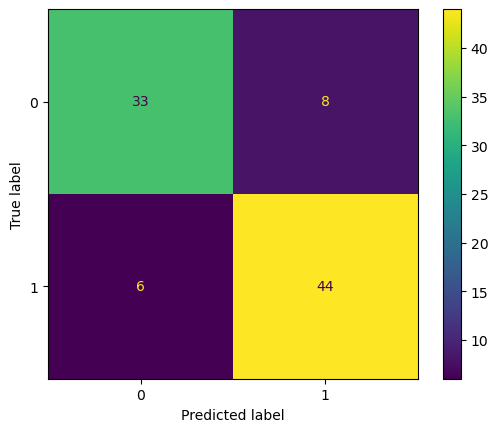

In [552]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

In [553]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test) 

Test_Set
[[33  8]
 [ 6 44]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        41
           1       0.85      0.88      0.86        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91


Train_Set
[[ 83  14]
 [ 11 104]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        97
           1       0.88      0.90      0.89       115

    accuracy                           0.88       212
   macro avg       0.88      0.88      0.88       212
weighted avg       0.88      0.88      0.88       212



### Cross Validate

In [554]:
# CV ile Yukarıda ki sonuçlarımızın genellenebilir bir sonuç olup olmadığına bakalım 

In [555]:
model = LogisticRegression()
scores = cross_validate(model, 
                        X_train_scaled, 
                        y_train, 
                        scoring = ['accuracy', 'precision','recall','f1'], 
                        cv = 15)
df_scores = pd.DataFrame(scores, index = range(1, 16))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.028982,0.012991,0.800000,0.777778,0.875000,0.823529
2,0.025981,0.005996,1.000000,1.000000,1.000000,1.000000
3,0.010991,0.006997,0.785714,1.000000,0.625000,0.769231
4,0.011993,0.005996,0.785714,0.777778,0.875000,0.823529
5,0.013990,0.005997,0.857143,0.875000,0.875000,0.875000
6,0.016990,0.004995,0.857143,1.000000,0.750000,0.857143
7,0.012991,0.005999,0.714286,0.700000,0.875000,0.777778
8,0.013988,0.005997,0.714286,0.700000,0.875000,0.777778
9,0.012991,0.009994,0.785714,0.857143,0.750000,0.800000
10,0.012997,0.007512,0.785714,0.727273,1.000000,0.842105


In [556]:
df_scores.mean()[2:]

test_accuracy     0.824762
test_precision    0.852030
test_recall       0.842857
test_f1           0.838164
dtype: float64

### GridSearchCV

In [557]:
model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)          # np.logspace(-3, 3, 7)    np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
solver = ["liblinear"] 

param_grid = {"penalty": penalty,
              "C": [1],
              "class_weight": class_weight,
              "solver": solver} 

grid_model = GridSearchCV(estimator = model,
                          param_grid = param_grid,
                          cv = 10,
                          scoring = 'accuracy',       
                          n_jobs = -1)

grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1], 'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [558]:
grid_model.best_params_

{'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}

In [559]:
grid_model.best_index_

2

In [560]:
grid_model.best_score_

0.8344155844155845

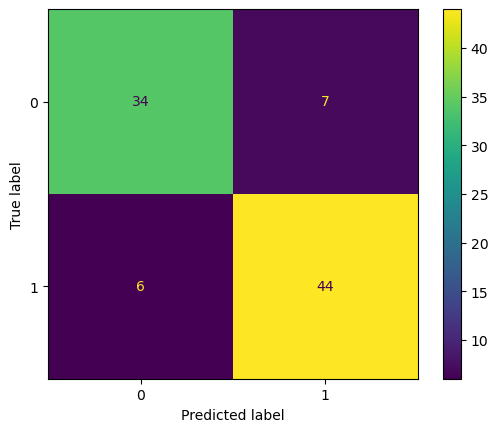

In [561]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)
plt.show()

In [562]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[34  7]
 [ 6 44]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        41
           1       0.86      0.88      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.86        91
weighted avg       0.86      0.86      0.86        91


Train_Set
[[ 82  15]
 [ 11 104]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        97
           1       0.87      0.90      0.89       115

    accuracy                           0.88       212
   macro avg       0.88      0.87      0.88       212
weighted avg       0.88      0.88      0.88       212



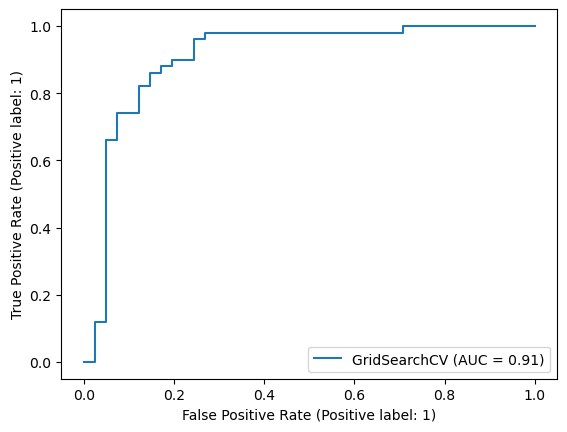

In [563]:
plot_roc_curve(grid_model, X_test_scaled, y_test)

In [564]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.9146341463414633

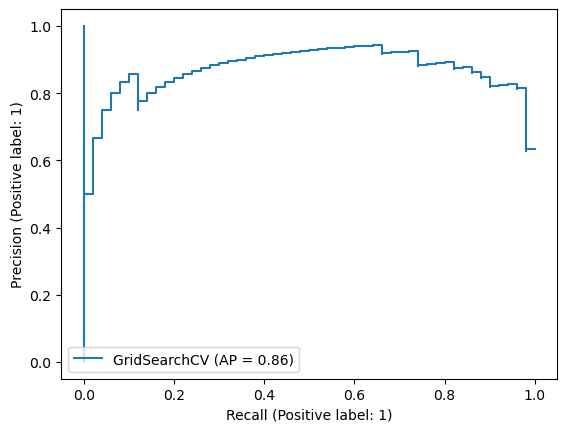

In [565]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

In [566]:
average_precision_score(y_test, y_pred_proba[:,1])

0.8882577211088449